<a href="https://colab.research.google.com/github/leonesso/Credit-Scoring---Fase-1/blob/main/Credit_Scoring_Fase_1_atual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o datasetinha
dados = pd.read_csv(r'/content/Base_ScoreCredito_QuantumFinance.csv', delimiter=';')



# Exibir as primeirasss linhas do dataset
print(dados.head())

          id  idade sexo estado_civil         escola  Qte_dependentes  \
0  708082083     45    F       casado      graduacao                3   
1  708083283     58    M     solteiro  ensino fundam                0   
2  708084558     46    M   divorciado      doutorado                3   
3  708085458     34    F     solteiro       mestrado                0   
4  708086958     49    F       casado       mestrado                2   

   tempo_ultimoservico  trabalha    vl_salario_mil  reg_moradia  casa_propria  \
0                   40         1   40,089665024322            3             0   
1                   44         1   66,557645274838            3             0   
2                   35         1   123,68182089138            6             0   
3                   22         1  19,7159343168329            6             0   
4                   36         0                 0            3             1   

   vl_imovel_em_mil  Qte_cartoes  Qte_carros SCORE_CREDITO  
0            

In [22]:
#dados['vl_salario_mil'] = dados['vl_salario_mil'].str.replace(',', '.').astype('float64').astype('int64')
#dados['SCORE_CREDITO'] = dados['SCORE_CREDITO'].str.replace(',', '.').astype('float64').astype('int64')

dados['SCORE_CREDITO'] = dados['SCORE_CREDITO'].str.replace(',', '.').astype(float)
dados['vl_salario_mil'] = dados['vl_salario_mil'].str.replace(',', '.').astype(float)

dados['id'] = dados['id'].astype('str')
dados['trabalha'] = dados['trabalha'].astype('category')
dados['casa_propria'] = dados['casa_propria'].astype('category')
dados['sexo'] = dados['sexo'].astype('category')
dados['estado_civil'] = dados['estado_civil'].astype('category')
dados['escola'] = dados['escola'].astype('category')


# Informações sobre o dataset
print("Informações sobre o dataset:")
dados_info = dados.info()
print(dados_info)

# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
dados_describe = dados.describe()
print(dados_describe)

# Verificar valores únicos para variáveis categóricas
print("\nValores únicos para a variável 'sexo':")
valores_unicos_sexo = dados['sexo'].unique()
print(valores_unicos_sexo)

print("\nValores únicos para a variável 'estado_civil':")
valores_unicos_estado_civil = dados['estado_civil'].unique()
print(valores_unicos_estado_civil)

print("\nValores únicos para a variável 'escola':")
valores_unicos_escola = dados['escola'].unique()
print(valores_unicos_escola)

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10127 non-null  object  
 1   idade                10127 non-null  int64   
 2   sexo                 10127 non-null  category
 3   estado_civil         10127 non-null  category
 4   escola               10127 non-null  category
 5   Qte_dependentes      10127 non-null  int64   
 6   tempo_ultimoservico  10127 non-null  int64   
 7   trabalha             10127 non-null  category
 8   vl_salario_mil       10127 non-null  float64 
 9   reg_moradia          10127 non-null  int64   
 10  casa_propria         10127 non-null  category
 11  vl_imovel_em_mil     10127 non-null  int64   
 12  Qte_cartoes          10127 non-null  int64   
 13  Qte_carros           10127 non-null  int64   
 14  SCORE_CREDITO        10127 non-null  floa

In [25]:
# Convert 'vl_salario_mil' to a string data type
dados['vl_salario_mil'] = dados['vl_salario_mil'].astype('str')

# Replace commas with periods in 'vl_salario_mil'
#dados['vl_salario_mil'] = dados['vl_salario_mil'].str.replace(',', '.')

# Convert 'vl_salario_mil' back to a float data type
dados['vl_salario_mil'] = dados['vl_salario_mil'].astype('float')

# Replace commas with periods in 'SCORE_CREDITO'
#dados['SCORE_CREDITO'] = dados['SCORE_CREDITO'].str.replace(',', '.')


# Média, Mediana e Desvio Padrão para variáveis numéricas
variaveis = ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'SCORE_CREDITO']

for var in variaveis:
    print(f"\nEstatísticas para a variável '{var}':")
    media = dados[var].mean()
    mediana = dados[var].median()
    desvio_padrao = dados[var].std()

    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Desvio Padrão: {desvio_padrao}")




Estatísticas para a variável 'idade':
Média: 46.32596030413745
Mediana: 46.0
Desvio Padrão: 8.01681403254903

Estatísticas para a variável 'tempo_ultimoservico':
Média: 34.133208255159474
Mediana: 34.0
Desvio Padrão: 8.221427650443347

Estatísticas para a variável 'vl_salario_mil':
Média: 70.20900176068369
Mediana: 66.4863307055766
Desvio Padrão: 55.56703186709509

Estatísticas para a variável 'SCORE_CREDITO':
Média: 469.5003638787401
Mediana: 449.6
Desvio Padrão: 133.814652616858


In [26]:
# Frequência para a variável 'sexo'
print("\nFrequência para a variável 'sexo':")
frequencia_sexo = dados['sexo'].value_counts()
porcentagem_sexo = dados['sexo'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_sexo = pd.DataFrame({
    'Quantidade': frequencia_sexo,
    'Porcentagem (%)': porcentagem_sexo
})

print(frequencia_e_porcentagem_sexo)

# Frequência para a variável 'estado_civil'
print("\nFrequência para a variável 'estado_civil':")
frequencia_estado_civil = dados['estado_civil'].value_counts()
porcentagem_estado_civil = dados['estado_civil'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_estado_civil = pd.DataFrame({
    'Quantidade': frequencia_estado_civil,
    'Porcentagem (%)': porcentagem_estado_civil
})

print(frequencia_e_porcentagem_estado_civil)

# Frequência para a variável 'escola'
print("\nFrequência para a variável 'escola':")
frequencia_escola = dados['escola'].value_counts()
porcentagem_escola = dados['escola'].value_counts(normalize=True) * 100

frequencia_e_porcentagem_escola = pd.DataFrame({
    'Quantidade': frequencia_escola,
    'Porcentagem (%)': porcentagem_escola
})

print(frequencia_e_porcentagem_escola)



Frequência para a variável 'sexo':
      Quantidade  Porcentagem (%)
sexo                             
F           5358        52.908068
M           4769        47.091932

Frequência para a variável 'estado_civil':
              Quantidade  Porcentagem (%)
estado_civil                             
casado              4687        46.282216
solteiro            3943        38.935519
na                   749         7.396070
divorciado           748         7.386195

Frequência para a variável 'escola':
               Quantidade  Porcentagem (%)
escola                                    
ensino medio         3352        33.099635
ensino fundam        2283        22.543695
graduacao            2094        20.677397
mestrado             1639        16.184457
doutorado             759         7.494816


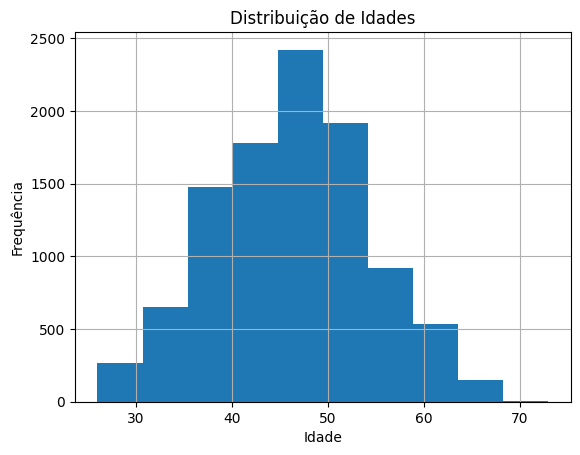

In [27]:
# Histograma para variáveis numéricas
dados['idade'].hist()
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

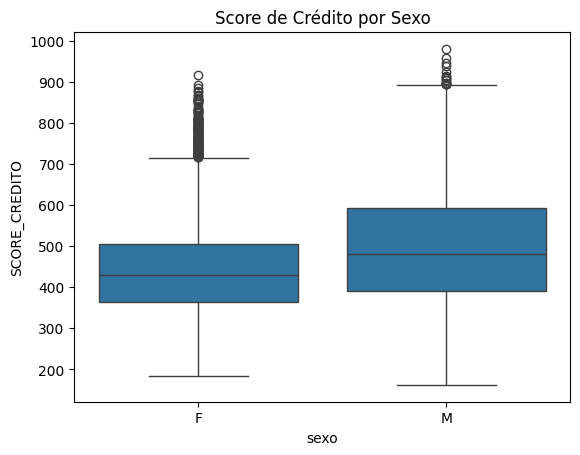

In [28]:
# Boxplot para variáveis numéricas
sns.boxplot(x='sexo', y='SCORE_CREDITO', data=dados)
plt.title('Score de Crédito por Sexo')
plt.show()

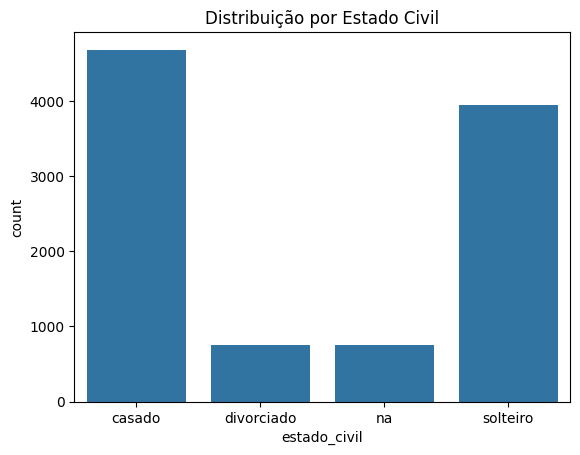

In [29]:
# Gráfico de barras para variáveis categóricas
sns.countplot(x='estado_civil', data=dados)
plt.title('Distribuição por Estado Civil')
plt.show()

In [30]:
# Matriz de correlação
print("\nMatriz de correlação:")
# Select only numerical columns for correlation calculation
correlacao = dados.select_dtypes(include=['number']).corr()
print(correlacao)


Matriz de correlação:
                        idade  Qte_dependentes  tempo_ultimoservico  \
idade                1.000000        -0.070599             0.768790   
Qte_dependentes     -0.070599         1.000000            -0.045323   
tempo_ultimoservico  0.768790        -0.045323             1.000000   
vl_salario_mil       0.091594         0.046175             0.134098   
reg_moradia         -0.018918        -0.014034            -0.080059   
vl_imovel_em_mil    -0.028444         0.087397             0.083303   
Qte_cartoes         -0.018235        -0.008482             0.046898   
Qte_carros           0.047805         0.163993            -0.018213   
SCORE_CREDITO        0.213320         0.103554             0.383998   

                     vl_salario_mil  reg_moradia  vl_imovel_em_mil  \
idade                      0.091594    -0.018918         -0.028444   
Qte_dependentes            0.046175    -0.014034          0.087397   
tempo_ultimoservico        0.134098    -0.080059        

In [31]:

# Selecionar as top 5 correlações
top_5_correlacoes = correlacao_abs.drop_duplicates().head(5)
print("\nTop 5 correlações:")
print(top_5_correlacoes)


NameError: name 'correlacao_abs' is not defined

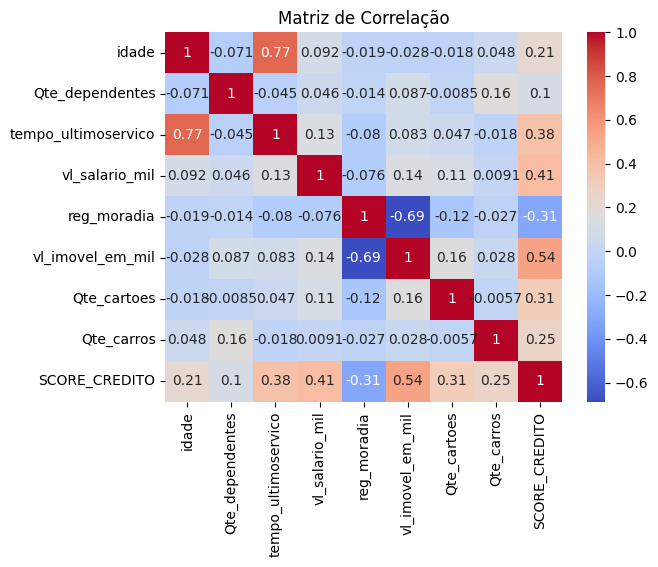

In [32]:
# Heatmap da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
from getpass import getpass

# Peça o token de acesso pessoal
token = getpass('Digite seu token de acesso pessoal: ')

# Use o token para clonar o repositório
!git clone https://{token}@github.com/leonesso/Credit-Scoring---Fase-1.git
%cd Credit-Scoring---Fase-1


Digite seu token de acesso pessoal: ··········
Cloning into 'Credit-Scoring---Fase-1'...
/content/Credit-Scoring---Fase-1


In [ ]:
# Configure o nome de usuário e e-mail
!git config --global user.email "leonardo.nesso@gmail.com"
!git config --global user.name "Leonardo Nesso"

# Inicialize um novo repositório Git
!git init

# Adicione um arquivo inicial
!echo "Arquivo inicial" > README.md

# Adicione o arquivo ao índice
!git add README.md

# Faça um commit inicial
!git commit -m "Commit inicial"

# Crie a nova branch 'main' e mude para ela
!git branch -M main

# Peça o token de acesso pessoal
from getpass import getpass
token = getpass('Digite seu token de acesso pessoal: ')

# Adicione a origem remota e empurre para o repositório remoto
!git remote add origin https://{token}@github.com/leonesso/Credit-Scoring---Fase-1.git
!git push -u origin main


Reinitialized existing Git repository in /content/Credit-Scoring---Fase-1/.git/
[main (root-commit) 1e5483d] Commit inicial
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
Digite seu token de acesso pessoal: ··········
error: remote origin already exists.
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Writing objects: 100% (3/3), 235 bytes | 235.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/leonesso/Credit-Scoring---Fase-1.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [ ]:
# Mude para a nova branch 'main'
!git checkout main

error: pathspec 'main' did not match any file(s) known to git
